In [ ]:
import pandas as pd
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']
x = df.loc[:, features].values
y =df.loc[:,['DEATH_EVENT']].values

In [ ]:
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA #creating a list of features and turning it into values - to bring data into a specific range
pca = PCA(n_components=2) # combines data and shows all the variables in two variables - you end up having only 2 variables - 
pc1 = pca.fit_transform(x) #values need to be transformed - reducing the range making it easier to compare - range decreased on each individual variable
pDF = pd.DataFrame(data = pc1, columns=['Principal Component1','Principal Component2']) #for the number of components it uses the most important features and considers them in the principal components - increasing the number of principal components increasing features - but less important features (less useful) - does not have any impact - 
finalDf = pd.concat([pDF,df[['DEATH_EVENT']]],axis=1) #using tabular data - rows and columns 
finalDf

,Principal Component1,Principal Component2,DEATH_EVENT
0,0.877055,2.287104,1
1,1.863753,-1.552894,1
2,2.526429,1.369821,1
3,0.579566,1.143232,1
4,-0.960485,2.639384,1
...,...,...,...
294,0.826097,-1.122232,0
295,-0.533627,-2.065782,0
296,-2.415521,-3.837399,0
297,2.227187,-2.394490,0


In [ ]:
#pca - principle components analysis - too many variables - dimensions - some classifiers perform worse when they are too many dimensions - pca lowers the number of dimensions
#kn classifier - accuracy not as good - reduce number of variables to increase the accuracy


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from scipy.spatial import distance
from sklearn.svm import SVC
import numpy as np

In [ ]:
#X = df.drop("DEATH_EVENT", axis =1)

X = finalDf.drop("DEATH_EVENT", axis = 1).values
y = finalDf["DEATH_EVENT"].values

#y=df["DEATH_EVENT"]
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn import metrics


In [ ]:
knn = KNeighborsClassifier(n_neighbors=8) #if you have too many variables it can reduce the efficiency of the model - clustering classifier - it starts off with two random clusters anywhere and plots the data randomly - distance method used to check distance between points and moves them closer accordingly - unsupervised - learns by itself - only giving it data without the label - semi-supervised learning method as you give it some datat to teach it - you do not give it anymore data
knn2 = knn.fit(X_train,y_train) #disappointing classifier - not good model for this data - lack accuracy could be because of too many variables - performance depended on fewer variables 
y_pred1 = knn2.predict(X_test)
print('test accuracy' , knn.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

test accuracy 0.75
Accuracy: 0.75


In [ ]:
from sklearn import svm #hyperparameter tuning - to increase accuracy - low accuracy but higher recall and precision

writ = svm.SVC(kernel='linear') #hyperparameter tuning - a linear kernel lead to a lower accuracy - 
writ.fit(X_train, y_train)

y_pred = writ.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3)) #looks at number of neighbours in the area - people who are more likely to die closer together - are neighbours - to predict accuracy - reducing distance

knn_pipe.fit(X_train, y_train)
print('Test dataset accuracy: {0}.'.format(knn_pipe.score(X_test, y_test)))

Test dataset accuracy: 0.6833333333333333.


In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_15 = KNeighborsClassifier(n_neighbors=15)

from sklearn.model_selection import cross_validate

# Note that the data was already implicitly shuffled by train_test_split
result_5 = cross_validate(knn_5, X_train, y_train, cv=5)
result_15 = cross_validate(knn_15, X_train, y_train, cv=5)

print('Average accuracy across folds (k = 5): {0}.'.format(result_5['test_score'].mean()))
print('Average accuracy across folds (k = 15): {0}.'.format(result_15['test_score'].mean()))
      
knn_5.fit(X_train, y_train)
print('Test dataset accuracy (k = 5): {0}.'.format(knn_5.score(X_test, y_test)))

Average accuracy across folds (k = 5): 0.723758865248227.
Average accuracy across folds (k = 15): 0.7449468085106383.
Test dataset accuracy (k = 5): 0.7.


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': [1, 3, 5, 7, 9]}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=5)
knn_cv.fit(X_train, y_train)

print('Best hyperparameter setting: {0}.'.format(knn_cv.best_estimator_))
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(knn_cv.best_score_))
print('Test dataset accuracy of best hyperparameter setting: {0}.'.format(knn_cv.score(X_test, y_test)))

Best hyperparameter setting: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform').
Average accuracy across folds of best hyperparameter setting: 0.749113475177305.
Test dataset accuracy of best hyperparameter setting: 0.7666666666666667.


In [ ]:
from sklearn.metrics import precision_recall_fscore_support #tradeoff - low accuracy but higher precision and recall - high accuracy - lower recall
from sklearn.metrics import confusion_matrix #precision - making an exact guess - accuracy is taking a look at a large dataset and making a guess between a range of values

y_pred = knn_cv.predict(X_test)

precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred)
print('Precision for each class: {0}.'.format(precision))
print('Recall for each class: {0}.\n'.format(recall))

updateDf = pd.DataFrame.from_records(confusion_matrix(y_test, y_pred))
print('Confusion matrix:')
display(updateDf)

Precision for each class: [0.73469388 0.90909091].
Recall for each class: [0.97297297 0.43478261].

Confusion matrix:


,0,1
0,36,1
1,13,10


In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']
x = df.loc[:, features].values
y =df.loc[:,['DEATH_EVENT']].values

In [ ]:
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA #
pca = PCA(n_components=2)
pc1 = pca.fit_transform(x)
pDF = pd.DataFrame(data = pc1, columns=['Principal Component1','Principal Component2'])
finalDf = pd.concat([pDF,df[['DEATH_EVENT']]],axis=1)
finalDf

,Principal Component1,Principal Component2,DEATH_EVENT
0,0.877055,2.287104,1
1,1.863753,-1.552894,1
2,2.526429,1.369821,1
3,0.579566,1.143232,1
4,-0.960485,2.639384,1
...,...,...,...
294,0.826097,-1.122232,0
295,-0.533627,-2.065782,0
296,-2.415521,-3.837399,0
297,2.227187,-2.394490,0


Knn - clustering - we choose k which was 8 - I chose 8 because it performed the best - 8 is the amount of neighbours we have/8 sections and to make a prediction we look at our neighbours - so if there are more neighbours classified as 0 the prediction is more likely to be 0. 

In [ ]:
import time

In [ ]:
%timeit pca

The slowest run took 33.15 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 31.2 ns per loop


In [ ]:
%timeit pc1

10000000 loops, best of 5: 31.1 ns per loop


In [ ]:
%timeit knn

The slowest run took 30.33 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 33.7 ns per loop


In [ ]:
%timeit knn2

The slowest run took 34.04 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 31 ns per loop


In [ ]:
%timeit y_pred1

10000000 loops, best of 5: 31.2 ns per loop


In [ ]:
%timeit writ

The slowest run took 38.24 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 33.4 ns per loop


In [ ]:
%timeit writ.fit

The slowest run took 44.47 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 118 ns per loop


In [ ]:
%timeit y_pred

10000000 loops, best of 5: 31.1 ns per loop


In [ ]:
%timeit knn_pipe

The slowest run took 35.06 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 31.2 ns per loop


In [ ]:
%timeit knn_pipe.fit(X_train,y_train)

The slowest run took 6.51 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 5: 1.99 ms per loop


In [ ]:
%timeit knn_cv

The slowest run took 36.20 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 30.9 ns per loop


In [ ]:
%timeit knn_cv.fit(X_train,y_train)

10 loops, best of 5: 127 ms per loop


In [ ]:
%timeit y_pred

The slowest run took 33.89 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 31 ns per loop


In [ ]:
pip install memory_profiler

  Created wheel for memory-profiler: filename=memory_profiler-0.58.0-cp37-none-any.whl size=30180 sha256=fe6c7ab37e9f6a24317787931b4e4d2bb7d77b7f9d3ae79770804827ba57179d
  Stored in directory: /root/.cache/pip/wheels/02/e4/0b/aaab481fc5dd2a4ea59e78bc7231bb6aae7635ca7ee79f8ae5
Successfully built memory-profiler


In [ ]:
%load_ext memory_profiler

In [ ]:
%memit pca

peak memory: 155.75 MiB, increment: 0.02 MiB


In [ ]:
%memit pc1

peak memory: 155.92 MiB, increment: 0.00 MiB


In [ ]:
%memit knn

peak memory: 156.04 MiB, increment: 0.00 MiB


In [ ]:
%memit knn2

peak memory: 156.07 MiB, increment: 0.02 MiB


In [ ]:
%memit y_pred1

peak memory: 156.13 MiB, increment: 0.00 MiB


In [ ]:
%memit writ

peak memory: 156.34 MiB, increment: 0.00 MiB


In [ ]:
%memit writ.fit

peak memory: 189.57 MiB, increment: 0.02 MiB


In [ ]:
%memit y_pred

peak memory: 189.82 MiB, increment: 0.00 MiB


In [ ]:
%memit knn_pipe

peak memory: 189.84 MiB, increment: 0.00 MiB


In [ ]:
%memit knn_pipe.fit(X_train,y_train)

peak memory: 189.84 MiB, increment: 0.00 MiB


In [ ]:
%memit knn_cv

peak memory: 189.84 MiB, increment: 0.00 MiB


In [ ]:
%memit knn_cv.fit(X_train,y_train)

peak memory: 190.09 MiB, increment: 0.00 MiB


In [ ]:
%memit y_pred

peak memory: 190.09 MiB, increment: 0.00 MiB


In [ ]:
#Cost assumptions
'''Cost of FP: 1, cost of FN: 2, cost of TN: 0, cost of TP: -1'''
cost_TP = -1; cost_FP = 1; cost_FN = 2; cost_TN = 0;
cb_matrix = -1*np.array([[cost_TP, cost_FP],[cost_FN, cost_TN]])

In [ ]:
def standard_confusion_matrix(y_true, y_predict):
    TP = sum((y_true == 1) & (y_predict == 1))
    TN = sum((y_true == 0) & (y_predict == 0))
    FP = sum((y_true == 0) & (y_predict == 1))
    FN = sum((y_true == 1) & (y_predict == 0))
    
    return np.array([[TP,FP],[FN,TN]])

In [ ]:
def profit_curve(cb, predict_probas, labels):
    indices = np.argsort(predict_probas)
    sorted_probs = predict_probas[indices]
    sorted_labels = labels[indices]
    
    profit_list = []
    
    for sp, sl in zip(sorted_probs, sorted_labels):
        predict_labels = sorted_probs > sp + .0001
        conf_mat = standard_confusion_matrix(sorted_labels, predict_labels)
        profit_list.append((cb * conf_mat).sum() / float(len(labels)))
    return profit_list, sorted_probs

In [ ]:
def plot_profit_curve(model, label, costbenefit, X_train, X_test, y_train, y_test, col):
    model.fit(X_train, y_train)
    predict_probas = model.predict_proba(X_test)[:,1]
    profit_list, sorted_probs = profit_curve(costbenefit, predict_probas, y_test)
    max_index = np.argmax(profit_list)
    max_threshold = sorted_probs[max_index]
    max_profit = profit_list[max_index]
    
    plt.plot(sorted_probs, profit_list, label=label, color=col, linewidth=3)
    plt.plot(max_threshold, max_profit, '.', color=col, markersize=18)

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

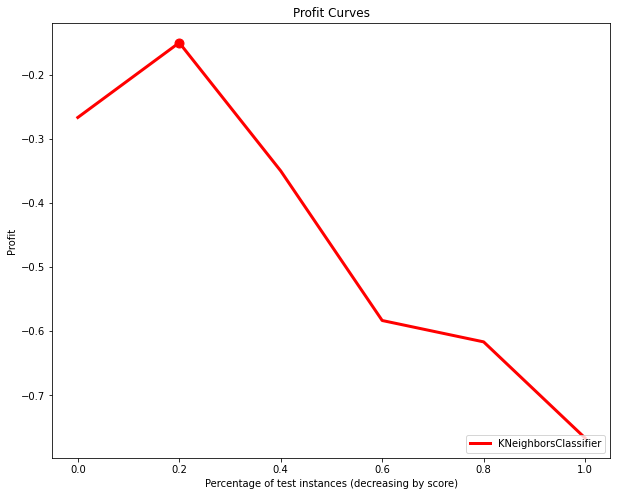

In [ ]:
models = [knn]
fig = plt.figure(figsize=(10,8))
# fig.set_facecolor('#F2F2F2')
colors = ['r', 'g', 'b', 'm']
for i, model in enumerate(models):
    plot_profit_curve(model, model.__class__.__name__, cb_matrix,
                      X_train, X_test, y_train, y_test, colors[i])
plt.title("Profit Curves")
plt.xlabel("Percentage of test instances (decreasing by score)")
plt.ylabel("Profit")
plt.legend(loc='lower right')
plt.savefig('Profit_curve.png', facecolor=fig.get_facecolor())
plt.show()

In [ ]:
report = classification_report(y_test,y_pred,output_dict = True)
import seaborn as sns
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

In [ ]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, y_pred)
print(auc_score1)

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
metrics.plot_roc_curve(writ, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

In [ ]:
import seaborn as sns

In [ ]:
group_names = ['True Neg','false Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report
https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
https://github.com/SydneyLauren/Profit-curves-and-xkcd-plotting
https://community.datarobot.com/t5/resources/profit-curve/ta-p/7389
https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
https://gist.github.com/fclesio/bb5871281debc07d75127552c56b08b5
https://stackoverflow.com/questions/61705257/sklearn-plotting-classification-report-gives-a-different-output-than-basic-avg
https://www.pyimagesearch.com/2016/08/15/how-to-tune-hyperparameters-with-python-and-scikit-learn/
https://towardsdatascience.com/
https://github.com/pragmaticpython/k-nearest-neighbors-python/blob/master/src/kNN.py
https://github.com/jakemath/KNN-SKLearn/blob/master/knn.ipynb
https://github.com/gavinest/knn_predicting_heart_disease/blob/master/eda.ipynb
https://github.com/jigsawcoder/Breast-Cancer-Classification-using-KNN
https://medium.com/analytics-vidhya/breast-cancer-classification-using-knn-algorithm-61257de55e9c
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
